In [1]:
import os
import numpy as np
import librosa as lb
import soundfile as sf
from pydub import AudioSegment

In [66]:
from matplotlib import pyplot as plt
from librosa import display

In [39]:
path = "/Users/rajeshr/Desktop/30March/saraga/"

In [40]:
mixture, fs = lb.load(path+'mixture.wav')
vocal, fs = lb.load(path+'vocals.wav')
mridangam, fs = lb.load(path+'mridangam.wav')
violin, fs = lb.load(path+'violin.wav')

In [41]:
b1 = 6*60*fs
b2 = int(b1+(10*fs))

In [42]:
sf.write('/Users/rajeshr/Desktop/mixture.wav', mixture[b1:b2], fs)
sf.write('/Users/rajeshr/Desktop/vocals.wav', vocal[b1:b2], fs)
sf.write('/Users/rajeshr/Desktop/mridangam.wav', mridangam[b1:b2], fs)
sf.write('/Users/rajeshr/Desktop/violin.wav', violin[b1:b2], fs)

In [216]:
path = "/Users/rajeshr/Desktop/"

In [217]:
mixture, fs = lb.load(path+'mixture.wav')
vocal, fs = lb.load(path+'vocals.wav')
mridangam, fs = lb.load(path+'mridangam.wav')
violin, fs = lb.load(path+'violin.wav')

In [218]:
mixture.shape, vocal.shape, mridangam.shape, violin.shape

((220500,), (220500,), (220500,), (220500,))

In [219]:
max_m, min_m = np.max(mixture), np.min(mixture)
max_m, min_m

(0.6835022, -0.84503174)

In [220]:
max_v, min_v = np.max(vocal), np.min(vocal)
max_mr, min_mr = np.max(mridangam), np.min(mridangam)
max_vi, min_vi = np.max(violin), np.min(violin)

max_v, min_v, max_mr, min_mr, max_vi, min_vi

(0.05987549, -0.07354736, 0.2555542, -0.22421265, 0.03137207, -0.033355713)

In [221]:
changed_vocal = np.interp(vocal,[min_v, max_v], [min_m, max_m])
changed_mridangam = np.interp(mridangam,[min_mr, max_mr], [min_m, max_m])
changed_violin = np.interp(violin,[min_vi, max_vi], [min_m, max_m])

In [222]:
sf.write('/Users/rajeshr/Desktop/processed_vocals.wav', changed_vocal, fs)
sf.write('/Users/rajeshr/Desktop/processed_mridangam.wav', changed_mridangam, fs)
sf.write('/Users/rajeshr/Desktop/processed_violin.wav', changed_violin, fs)

In [223]:
hpf_mridangam_ = AudioSegment.from_wav("/Users/rajeshr/Desktop/processed_mridangam.wav")
hpf_mridangam = hpf_mridangam_.high_pass_filter(30)
hpf_mridangam.export("/Users/rajeshr/Desktop/hpf_mridangam.wav", "wav")

<_io.BufferedRandom name='/Users/rajeshr/Desktop/hpf_mridangam.wav'>

In [224]:
hpf_mrid, fs = lb.load('/Users/rajeshr/Desktop/hpf_mridangam.wav')
stft_hpf_mrid = lb.stft(hpf_mrid)

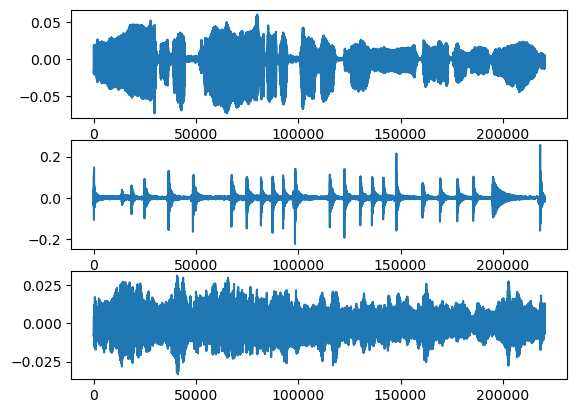

In [225]:
plt.subplot(3, 1, 1)
plt.plot(vocal)
plt.subplot(3, 1, 2)
plt.plot(mridangam)
plt.subplot(3, 1, 3)
plt.plot(violin)
plt.show()

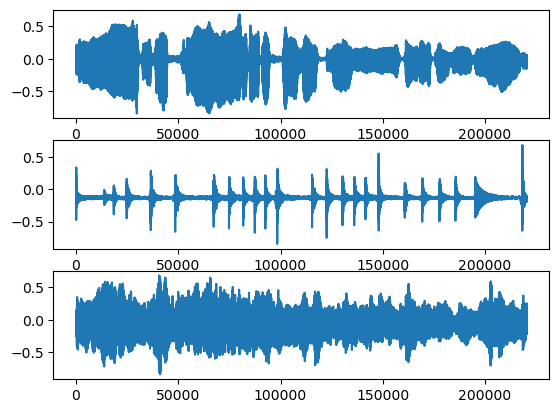

In [226]:
plt.subplot(3, 1, 1)
plt.plot(changed_vocal)
plt.subplot(3, 1, 2)
plt.plot(changed_mridangam)
plt.subplot(3, 1, 3)
plt.plot(changed_violin)
plt.show()

In [227]:
cvstft = lb.stft(changed_vocal)
cmrstft = lb.stft(changed_mridangam)
cvistft = lb.stft(changed_violin)

vstft = lb.stft(vocal)
mrstft = lb.stft(mridangam)
vistft = lb.stft(violin)

mstft = lb.stft(mixture)

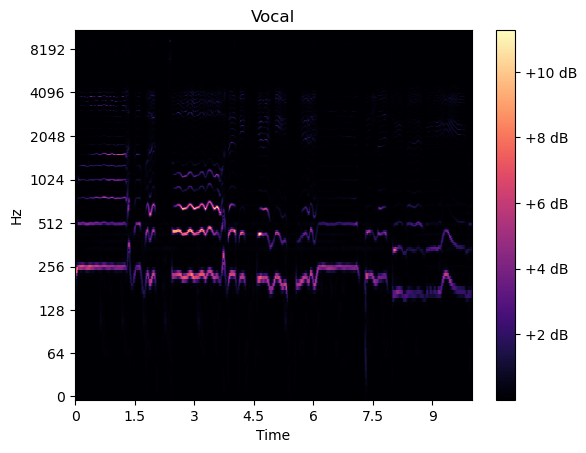

In [228]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(vstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Vocal')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

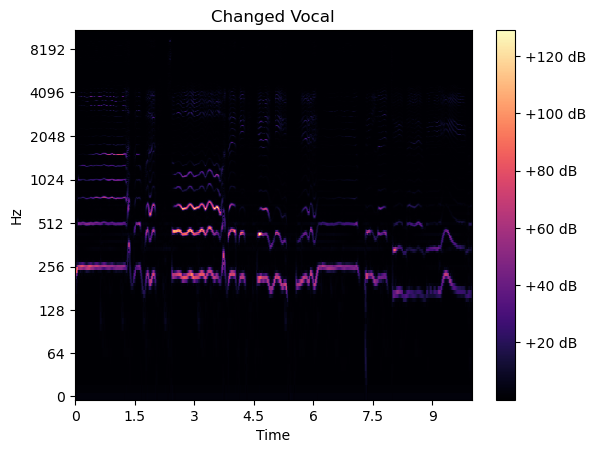

In [229]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(cvstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Changed Vocal')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

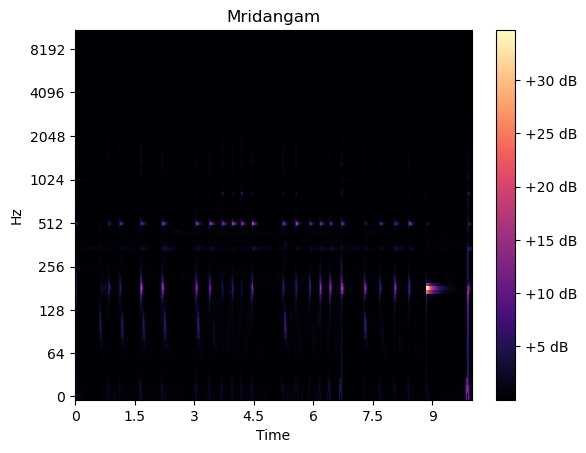

In [230]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(mrstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Mridangam')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

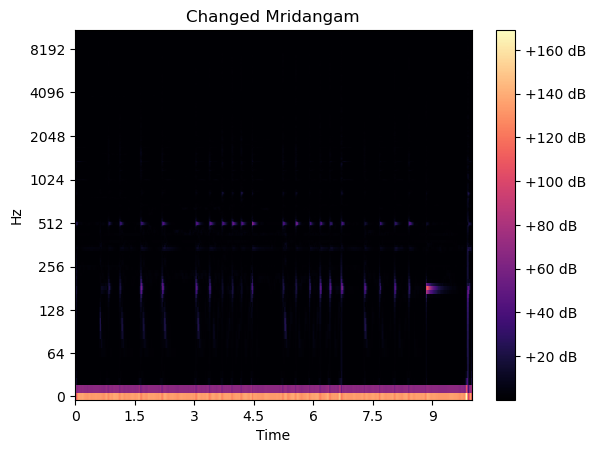

In [231]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(cmrstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Changed Mridangam')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

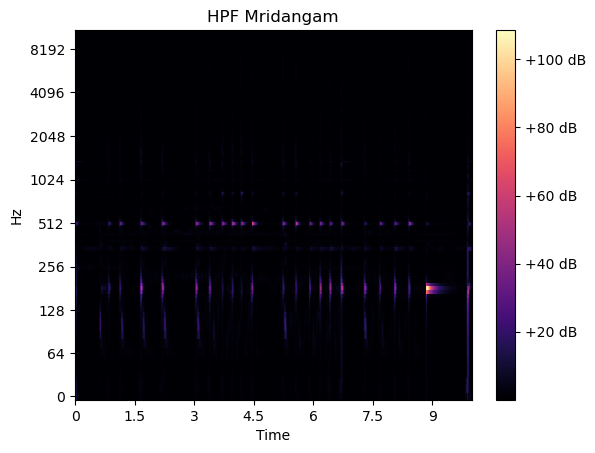

In [232]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(stft_hpf_mrid), x_axis='time', y_axis='log', ax=ax)
ax.set(title='HPF Mridangam')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

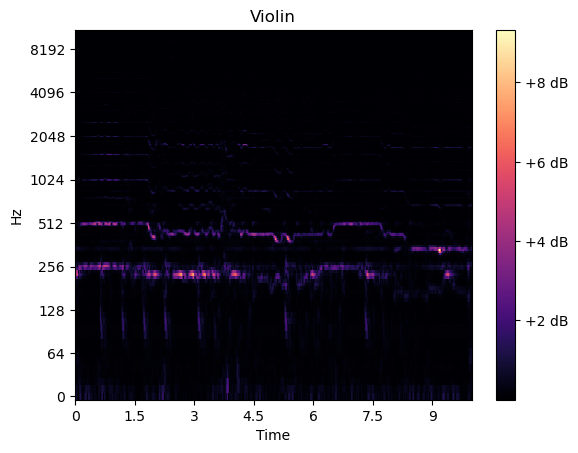

In [233]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(vistft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Violin')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

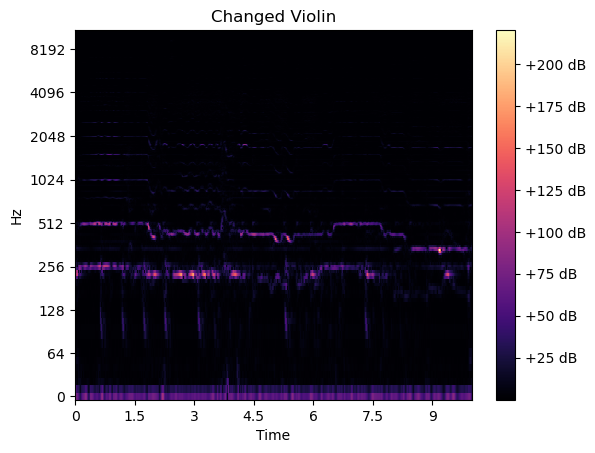

In [234]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(cvistft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Changed Violin')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

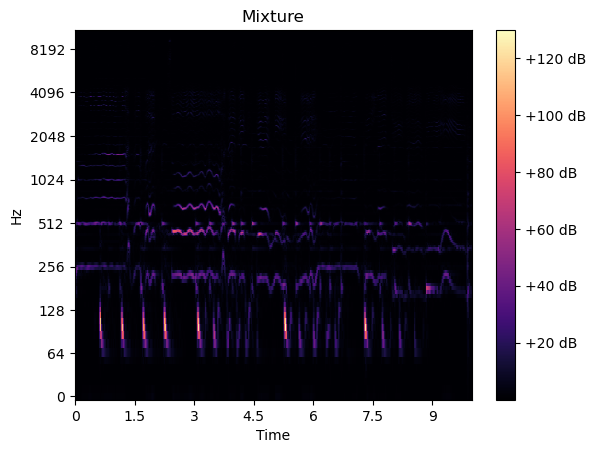

In [78]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(mstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Mixture')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

In [85]:
pydb_mixture = AudioSegment.from_file(path+'mixture.wav')
pydb_vocal = AudioSegment.from_file(path+'vocals.wav')
pydb_mridangam = AudioSegment.from_file(path+'mridangam.wav')
pydb_violin = AudioSegment.from_file(path+'violin.wav')

In [131]:
pydb_vocal_process = pydb_vocal.apply_gain(+18.29)
pydb_mridangam_process = pydb_mridangam.apply_gain(+18.29)
pydb_violin_process = pydb_violin.apply_gain(+18.29)

In [189]:
pydb_vocal_process.export(path+"vocal1.wav", "wav")
pydb_mridangam_process.export(path+"mridangam1.wav", "wav")
pydb_violin_process.export(path+"violin1.wav", "wav")

<_io.BufferedRandom name='/Users/rajeshr/Desktop/violin1.wav'>

In [132]:
pydb_vocal_process.dBFS, pydb_mridangam_process.dBFS, pydb_violin_process.dBFS

(-19.697321506292003, -18.966117795281214, -25.2373929079507)

In [133]:
pydb_vocal.dBFS, pydb_mridangam.dBFS, pydb_violin.dBFS

(-37.98999766606634, -37.11067469779735, -43.539868827102254)

In [130]:
pydb_mixture.dBFS

-19.697321506292003

In [188]:
pydb_vocal_process2 = pydb_vocal.apply_gain(+18.29)
pydb_mridangam_process2 = pydb_mridangam.apply_gain(+17.53)
pydb_violin_process2 = pydb_violin.apply_gain(+24.19)
pydb_vocal_process2.dBFS, pydb_mridangam_process2.dBFS, pydb_violin_process2.dBFS

(-19.697321506292003, -19.697321506292003, -19.338753572373648)